In [1]:
# 라이브러리 가져오기
import numpy as np
from sklearn.datasets import fetch_california_housing       # 캘리포니아 주택 데이터셋
from sklearn.linear_model import SGDRegressor               # 확률적 경사하강법 회귀 모델
from sklearn.model_selection import train_test_split        # 훈련/테스트 데이터 분할 함수
from sklearn.preprocessing import StandardScaler            # 특성 정규화를 위한 스케일러
from sklearn.metrics import mean_squared_error, r2_score    # 성능 평가 지료
import matplotlib.pyplot as plt                             # 시각화 라이브러리

In [2]:
# 1. 데이터 로딩
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

print("==== X ====")
print(X)
print("==== y ====")
print(y)
print("==== feature_names ====")
print(feature_names)

==== X ====
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
==== y ====
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
==== feature_names ====
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
# 2. 학습용/테스트용 데이터 분할 (훈련: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("train:", len(X_train))
print("test:", len(X_test))

train: 16512
test: 4128


In [4]:
# 3. 입력 특성 정규화 (표준화: 평균 0, 표준편차 1로 맞춤)
# SGD는 입력값 크기에 민감하므로 반드시 정규화가 필요
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]
[[-1.15508475 -0.28632369 -0.52068576 ...  0.06740798  0.1951
   0.28534728]
 [-0.70865905  0.11043502 -0.16581537 ... -0.03602975 -0.23549054
   0.06097472]
 [-0.21040155  1.85617335 -0.61076476 ... -0.14998876  1.00947776
  -1.42487026]
 ...
 [ 2.80902421 -0.28632369  0.75501156 ... -0.02646898  0.78014149
  -1.23041404]
 [-0.57542978  0.58654547 -0.06124296 ... -0.04390537  0.52740357
  -0.08860699]
 [-0.17259111 -0.92113763 -0.6058703  ...  0.05466644 -0.66608108
   0.60445493]]


In [5]:
# 4. SGDRegressor 모델 정의 및 학습
model = SGDRegressor(
    max_iter=1000,              # 최대 반복 횟수 (epoch 수)
    tol=0.01,                   # 손실이 tol 보다 작아지면 학습 중단 (수렴 기준)
    eta0=0.0001,                # 학습률(learning_rate) 초기값
    learning_rate="constant",   # 학습률 고정 방식
    penalty=None,               # 정규화 없음 (과적합 방지 설정 사용 안함)
    random_state=42             # 결과 재현을 위한 시드 고정
)
model.fit(X_train_scaled, y_train)  # 학습 수행

SGDRegressor(eta0=0.0001, learning_rate='constant', penalty=None,
             random_state=42, tol=0.01)

In [6]:
# 5. 예측 및 평가
y_pred = model.predict(X_test_scaled)   # 테스트 데이터 예측 수행

# MSE (평균 제곱 오차), R2(설명력 지표) 출력
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R2 score: {r2_score(y_test, y_pred):.4f}")

MSE: 0.5577
R2 score: 0.5744


In [7]:
# 6-1. 회귀 계수 출력 (각 특성이 결과에 얼마나 영향을 주는지 보여줌)

for name, coef in zip(feature_names, model.coef_):
    # 각 특성 이름과 회귀 계수를 정렬된 형태로 출력
    print(f"{name:<20}: {coef:>20,.2f}")

MedInc              :                 0.84
HouseAge            :                 0.17
AveRooms            :                -0.19
AveBedrms           :                 0.20
Population          :                 0.01
AveOccup            :                -0.04
Latitude            :                -0.57
Longitude           :                -0.53


In [8]:
# 6-2 절편 출력
print(f"절편 (bias): {model.intercept_[0]:,.2f}")

절편 (bias): 2.07


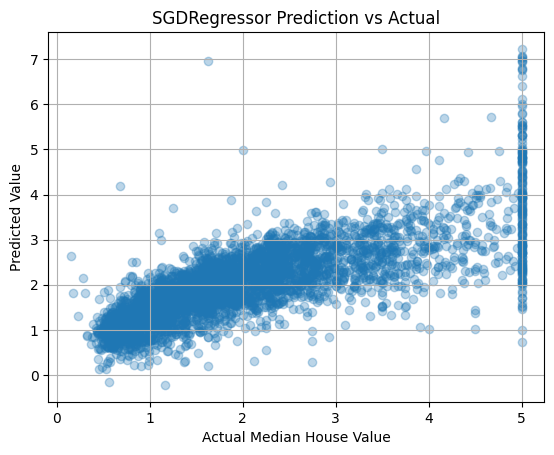

In [9]:
# 7. 예측 결과 시각화 (실제값 vs 예측값 산점도)
plt.scatter(y_test, y_pred, alpha=0.3)  # 예측 분포를 산점도로 표현
plt.xlabel("Actual Median House Value") # 실제 집값
plt.ylabel("Predicted Value")           # 예측된 집값
plt.title("SGDRegressor Prediction vs Actual")  # 그래프 제목
plt.grid(True)                          # 격자 표시
plt.show()